# <center> **Chapitre 2 : Importation, Manipulation et Visualisation des données de séries temporelles avec Python**

Par [Josué AFOUDA](https://josueafouda.shinyapps.io/jadatatechconsulting/)

## Objectif 1 : Web Scraping de données de séries chronologiques

Pour ce premier objectif, vous apprendrez d'abord à récupérer sur internet des données de séries chronologiques et à les mettre sous un bon format. En effet, même si les données temporelles sont partout, les retrouver et les assembler est souvent un parcours de combattant, comme c'est le cas dans la plupart des projets de Data Science dignes du nom !. J'ai donc imaginé un beau scénario pour vous :). 

***Vous êtes Analyste quantitatif dans une société d'investissement. Votre Manager vous demande de créer une dataframe des prix journaliers de clôture des Actions françaises. Chaque secteur doit être représenté par la plus grande entreprise du CAC 40 (indice boursier représentant le marché financier en France) selon la [capitalisation boursière](https://www.investopedia.com/terms/m/marketcapitalization.asp). Vous devez récupérer les données depuis le 1er Janvier 2015 jusqu'à ce jour afin de permettre une actualisation automatique des informations.*** 

Ayant commencé par une recherche internet sur l'indice du CAC 40, vous avez obtenu les informations ci-dessous : 

* Le **CAC (Cotation Assistée en Continu) 40** est le principal indice de la bourse de Paris.

* Liste des actions qui composent le CAC 40 : https://en.wikipedia.org/wiki/CAC_40 (Recherche Google).

Vous allez donc utiliser le lien ci-dessus pour scrapper les données à partir de Yahoo Finance. Commençons par importer les librairies nécessaires.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#!pip install xgboost

In [3]:
# Importation des librairies

import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader, get_quote_yahoo
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [4]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[3]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


Etant donné que vous voulez récupérer les prix journaliers de la plus grande entreprise, par secteur, en matière de capitalisation boursière, il faudra avoir la capitalisation boursière de chacune des entreprises de cet indice. 

Lorsque vous copiez-collez par exemple le symbole de la société Air Liquide dans la barre de recherche de Yahoo Finance, vous obtenez ce lien : https://fr.finance.yahoo.com/quote/AI.PA?p=AI.PA&.tsrc=fin-srch. 

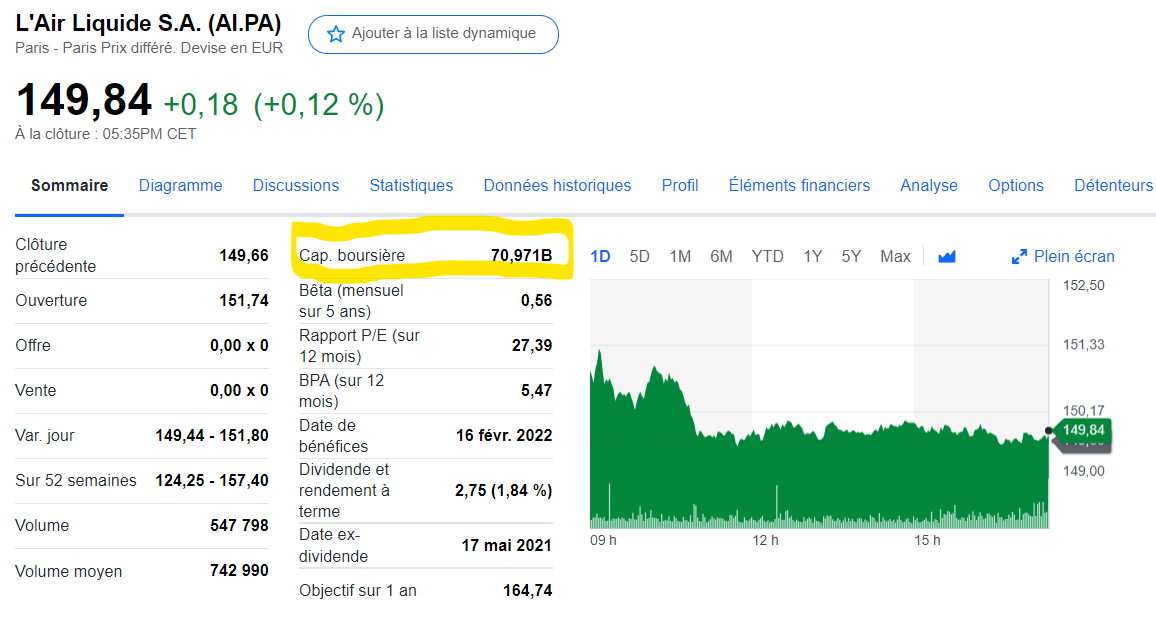

Comme le montre la figure ci-dessus, la capitalisation boursière de Air Liquide est de 70,971 milliards d'euros à l'heure où j'écris cette phrase. Cette valeur est certainement placée au même endroit pour n'importe quelle action. Pour vous en rassurer, vous pouvez rechercher par exemple la capitalisation boursière de LVMH (figure ci-dessous) :

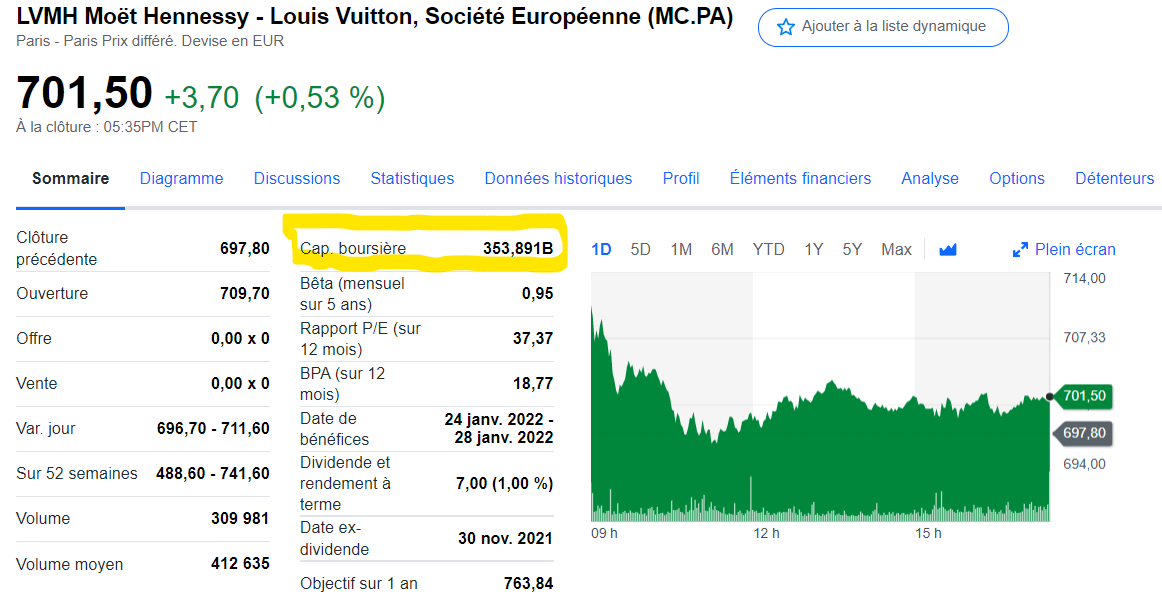

L'idée est donc de récupérer automatiquement la capitalisation boursière de chaque entreprise du CAC40 et d'ajouter ces informations dans une nouvelle colonne de la dataframe précédente. Je vais vous montrer un moyen simple de le faire.

In [5]:
# Symboles des actions du CAC40

tickers = cac40['Ticker'].to_list()

tickers

['AI.PA',
 'AIR.PA',
 'ALO.PA',
 'MT.AS',
 'CS.PA',
 'BNP.PA',
 'EN.PA',
 'CAP.PA',
 'CA.PA',
 'ACA.PA',
 'BN.PA',
 'DSY.PA',
 'ENGI.PA',
 'EL.PA',
 'ERF.PA',
 'RMS.PA',
 'KER.PA',
 'OR.PA',
 'LR.PA',
 'MC.PA',
 'ML.PA',
 'ORA.PA',
 'RI.PA',
 'PUB.PA',
 'RNO.PA',
 'SAF.PA',
 'SGO.PA',
 'SAN.PA',
 'SU.PA',
 'GLE.PA',
 'STLA.PA',
 'STM.PA',
 'TEP.PA',
 'HO.PA',
 'TTE.PA',
 'URW.AS',
 'VIE.PA',
 'DG.PA',
 'VIV.PA',
 'WLN.PA']

https://stackoverflow.com/questions/54815864/downloading-a-companys-market-cap-from-yahoo

In [6]:
# Récupération des capitalisations boursières

market_cap = get_quote_yahoo(tickers)['marketCap']

market_cap

AI.PA       71757291520
AIR.PA      87889035264
ALO.PA      11410859008
MT.AS       26316079104
CS.PA       61823279104
BNP.PA      73751216128
EN.PA       11768436736
CAP.PA      36336648192
CA.PA       11990923264
ACA.PA      37787246592
BN.PA       34175887360
DSY.PA      68822097920
ENGI.PA     31143133184
EL.PA       81205116928
ERF.PA      20797460480
RMS.PA     160157646848
KER.PA      85234712576
OR.PA      235532779520
LR.PA       27021674496
MC.PA      363608440832
ML.PA       25619054592
ORA.PA      24698406912
RI.PA       55094358016
PUB.PA      14710588416
RNO.PA       8638480384
SAF.PA      45681897472
SGO.PA      31624699904
SAN.PA     110289780736
SU.PA       94896381952
GLE.PA      24959913984
STLA.PA     51957641216
STM.PA      39446614016
TEP.PA      22465411072
HO.PA       15861037056
TTE.PA     116928126976
URW.AS       8346130944
VIE.PA      21883951104
DG.PA       51004248064
VIV.PA      12492529664
WLN.PA      13831350272
Name: marketCap, dtype: int64

In [7]:
# Création d'une colonne Market Capitalization

cac40['Market Capitalization'] = market_cap.values

# Changeons l'unité en milliards d'euros

cac40['Market Capitalization'] = cac40['Market Capitalization'] / 1000000000

cac40.head()

,Company,Sector,GICS Sub-Industry,Ticker,Market Capitalization
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA,71.757292
1,Airbus,Industrials,Aerospace & Defense,AIR.PA,87.889035
2,Alstom,Industrials,Rail Transport,ALO.PA,11.410859
3,ArcelorMittal,Basic Materials,Steel,MT.AS,26.316079
4,AXA,Financial Services,Life & Health Insurance,CS.PA,61.823279


Chaque ligne désigne une unique entreprise. Définissons la colonne 'Ticker' comme indices de lignes de la dataframe ci-dessus :

In [8]:
cac40.set_index('Ticker', inplace = True)

cac40.head()

,Company,Sector,GICS Sub-Industry,Market Capitalization
Ticker,,,,
AI.PA,Air Liquide,Basic Materials,Industrial Gases,71.757292
AIR.PA,Airbus,Industrials,Aerospace & Defense,87.889035
ALO.PA,Alstom,Industrials,Rail Transport,11.410859
MT.AS,ArcelorMittal,Basic Materials,Steel,26.316079
CS.PA,AXA,Financial Services,Life & Health Insurance,61.823279


Nous pouvons maintenant rechercher, pour chaque secteur, la plus grande entreprise en matière de capitalisation boursière.

In [9]:
# Quelle est la plus grande entreprise par secteur ?

composantes = cac40.groupby('Sector')['Market Capitalization'].nlargest(1)

composantes

Sector                  Ticker 
Basic Materials         AI.PA       71.757292
Communication Services  ORA.PA      24.698407
Consumer Cyclical       MC.PA      363.608441
Consumer Defensive      OR.PA      235.532780
Energy                  TTE.PA     116.928127
Financial Services      BNP.PA      73.751216
Healthcare              SAN.PA     110.289781
Industrials             SU.PA       94.896382
Real Estate             URW.AS       8.346131
Technology              DSY.PA      68.822098
Utilities               ENGI.PA     31.143133
Name: Market Capitalization, dtype: float64

In [10]:
# Transformation du résultat en une dataframe

composantes = composantes.reset_index()

composantes

,Sector,Ticker,Market Capitalization
0,Basic Materials,AI.PA,71.757292
1,Communication Services,ORA.PA,24.698407
2,Consumer Cyclical,MC.PA,363.608441
3,Consumer Defensive,OR.PA,235.532780
4,Energy,TTE.PA,116.928127
5,Financial Services,BNP.PA,73.751216
6,Healthcare,SAN.PA,110.289781
7,Industrials,SU.PA,94.896382
8,Real Estate,URW.AS,8.346131
9,Technology,DSY.PA,68.822098


In [11]:
# Classement par ordre décroissant de capitalisation boursière

composantes.sort_values(by = 'Market Capitalization', ascending = False)

,Sector,Ticker,Market Capitalization
2,Consumer Cyclical,MC.PA,363.608441
3,Consumer Defensive,OR.PA,235.532780
4,Energy,TTE.PA,116.928127
6,Healthcare,SAN.PA,110.289781
7,Industrials,SU.PA,94.896382
5,Financial Services,BNP.PA,73.751216
0,Basic Materials,AI.PA,71.757292
9,Technology,DSY.PA,68.822098
10,Utilities,ENGI.PA,31.143133
1,Communication Services,ORA.PA,24.698407


Il y a 11 secteurs distincts dans la bourse de Paris et la société LVMH (MC.PA) est la plus grande entreprise en matière de capitalisation boursière.

In [12]:
# Création d'une liste des symboles des plus grandes entreprises

symbols = composantes['Ticker'].to_list()

symbols

['AI.PA',
 'ORA.PA',
 'MC.PA',
 'OR.PA',
 'TTE.PA',
 'BNP.PA',
 'SAN.PA',
 'SU.PA',
 'URW.AS',
 'DSY.PA',
 'ENGI.PA']

A présent que nous connaissant les plus grandes entreprises du CAC40 par secteur ainsi que leurs symboles, nous allons importer les prix quotidiens de chaque Action à partir de Yahoo Finance.

In [13]:
# Téléchargement des prix journaliers de clôture

from pandas_datareader.data import DataReader

stocks_prices = DataReader(
    symbols, 
    'yahoo', 
    start = '2000-01-01')['Adj Close']

stocks_prices.head()

Symbols,AI.PA,ORA.PA,MC.PA,OR.PA,TTE.PA,BNP.PA,SAN.PA,SU.PA,URW.AS,DSY.PA,ENGI.PA
Date,,,,,,,,,,,
2000-01-03,18.313591,40.522755,58.498810,55.292549,11.373842,16.165976,19.861181,20.566505,10.233084,5.694493,12.043446
2000-01-04,17.500860,38.357414,52.965118,51.368118,10.960248,15.711586,18.626030,19.837564,10.404984,5.133419,11.832554
2000-01-05,17.338314,36.346745,51.173290,49.616127,10.684521,15.379522,17.840479,19.004494,10.395164,4.735641,11.666851
2000-01-06,18.584507,35.882736,50.593548,51.508278,10.374323,14.855223,18.527220,19.967733,10.707041,4.794260,11.825020
2000-01-07,18.356936,36.965412,50.593548,52.559456,10.426025,15.047465,19.515337,20.332203,10.640738,5.024552,11.599060


Pour mieux comprendre le code ci-dessus, vous pouvez regarder ma vidéo [Collecte de Données boursières sur Yahoo Finance avec pandas-datareader | Vidéo 3 Python for Finance](https://youtu.be/y2vUTNRp5uk).

In [14]:
stocks_prices.tail()

Symbols,AI.PA,ORA.PA,MC.PA,OR.PA,TTE.PA,BNP.PA,SAN.PA,SU.PA,URW.AS,DSY.PA,ENGI.PA
Date,,,,,,,,,,,
2021-12-20,149.660004,9.260,697.799988,411.000000,43.365002,56.419998,86.900002,164.660004,56.509998,51.759998,12.758
2021-12-21,149.839996,9.344,701.500000,414.899994,44.400002,58.860001,87.680000,166.339996,58.669998,51.439999,12.952
2021-12-22,150.339996,9.373,715.400024,419.000000,44.709999,59.349998,87.860001,167.940002,59.549999,52.660000,12.862
2021-12-23,151.500000,9.349,722.000000,422.649994,45.119999,60.000000,88.160004,170.779999,60.290001,52.630001,12.886
2021-12-24,150.479996,9.384,717.400024,422.350006,44.775002,59.750000,87.860001,170.500000,60.220001,52.689999,12.868


SUPER TRAVAIL ! Vous venez d'obtenir la dataframe telle que souhaitée par votre Manager qui sera très content. Votre code est aussi réutilisable ce qui permettra d'actualiser les informations au cas où la situation du marché fiancier en France évolue.

L'objectif 1 de ce chapitre étant atteint, passons à l'objectif 2.

## Objectif 2 : Manipulation et visulaisation de données de séries temporelles

Pour l'objectif 2, vous apprendrez à manipuler et visualiser les séries temporelles en utilisant des méthodes et fonctions basiques de Python et Pandas. Tout ceci se fera à travers un exercice dont le but est d'analyser le taux de chômage aux États-Unis de 2000 à 2010. Les données que nous utiliserons ici proviennent de [Kaggle](https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020), la célèbre palteforma de compétitions en Data Science.

Sans plus tarder, commencer par importer les librairies nécessaires ainsi que les données.

In [15]:
# Importation des données

df = pd.read_csv('US_Unemployment_dataset.txt')

df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


Si vous n'avez pas compris le code ci-dessus, alors il faudra aller regarder ma vidéo [Importation des données dans Python avec PANDAS](https://youtu.be/59JbFaI8Lfk) où j'explique clairement comment importer différents types de fichiers de données avec Pandas.

In [16]:
df.tail()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5
121,2010-02-01,18.8,12.0,27.1,13.6,5.6,7.5,4.0,10.0,12.7,12.1,10.7,9.7,9.9,6.5,10.5,10.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   datestamp                       122 non-null    object 
 1   Agriculture                     122 non-null    float64
 2   Business services               122 non-null    float64
 3   Construction                    122 non-null    float64
 4   Durable goods manufacturing     122 non-null    float64
 5   Education and Health            122 non-null    float64
 6   Finance                         122 non-null    float64
 7   Government                      122 non-null    float64
 8   Information                     122 non-null    float64
 9   Leisure and hospitality         122 non-null    float64
 10  Manufacturing                   122 non-null    float64
 11  Mining and Extraction           122 non-null    float64
 12  Nondurable goods manufacturing  122 

L'ensemble de données contient le taux de chômage de 16 différentes industries aux États-Unis au cours des années 2000-2010 à savoir : Agriculuture, Construction, Finance, etc. Il y a 122 points temporels (un par mois pendant 10 ans) allant de Janvier 2000 à Février 2010. La colonne *datestamp* est stockée sous forme de chaînes de caractères (type object) alors qu'elle a des valeurs de type date. Nous devons transformer le type de cette colonne en *datetime* :

In [18]:
df['datestamp'] = pd.to_datetime(df['datestamp'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datestamp                       122 non-null    datetime64[ns]
 1   Agriculture                     122 non-null    float64       
 2   Business services               122 non-null    float64       
 3   Construction                    122 non-null    float64       
 4   Durable goods manufacturing     122 non-null    float64       
 5   Education and Health            122 non-null    float64       
 6   Finance                         122 non-null    float64       
 7   Government                      122 non-null    float64       
 8   Information                     122 non-null    float64       
 9   Leisure and hospitality         122 non-null    float64       
 10  Manufacturing                   122 non-null    float64       
 11  Mining

In [20]:
# Colonne datestamp en tant que indices de lignes

df.set_index('datestamp', inplace = True)

df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [21]:
df.isna().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

Il n'y a pas de valeurs manquantes dans l'ensemble de données. Vous pouvez donc commencer l'analyse exploratoire.

In [22]:
# Résumé statistique

df.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


Le secteur qui a en moyenne le plus grand taux de chômage est l'Agriculture. 

Puisqu'il y a 16 secteus au total, vous pouvez tracer l'évolution du taux de chaômage dans une matrice de graphiques (4 X 4) : 

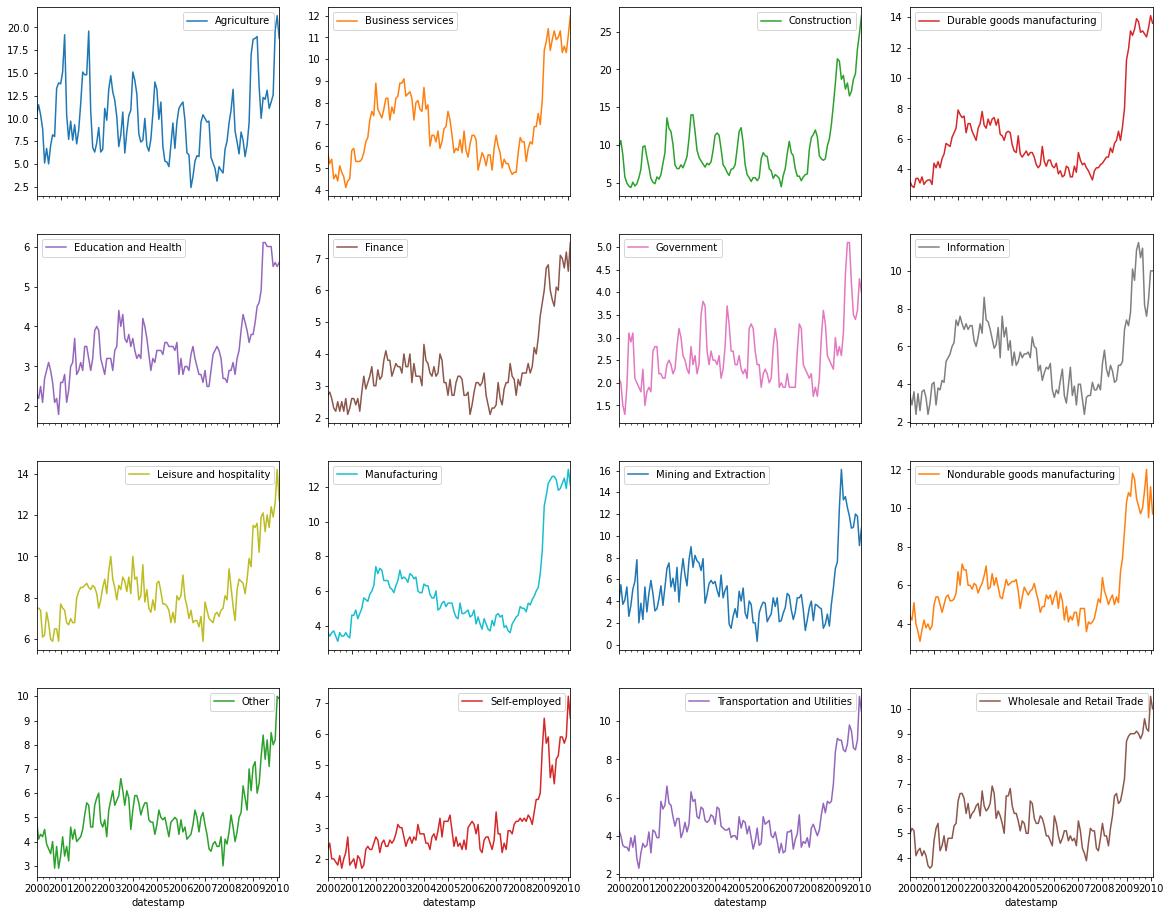

In [23]:
import matplotlib.pyplot as plt

df.plot(
    subplots = True, 
    layout = (4, 4), 
    figsize = (20, 16), 
    sharex = True, # Tous les graphiques ont les mêmes valeurs dans l'axe des abscisses
    sharey = False) # Les axes des ordonnées sont différents

plt.show()

Le taux de chômage a grimpé en flèche après la crise financière de 2008 et tous les secteurs ont été affectés.

Vous pouvez aussi visualiser ces courbes dans un même graphique :

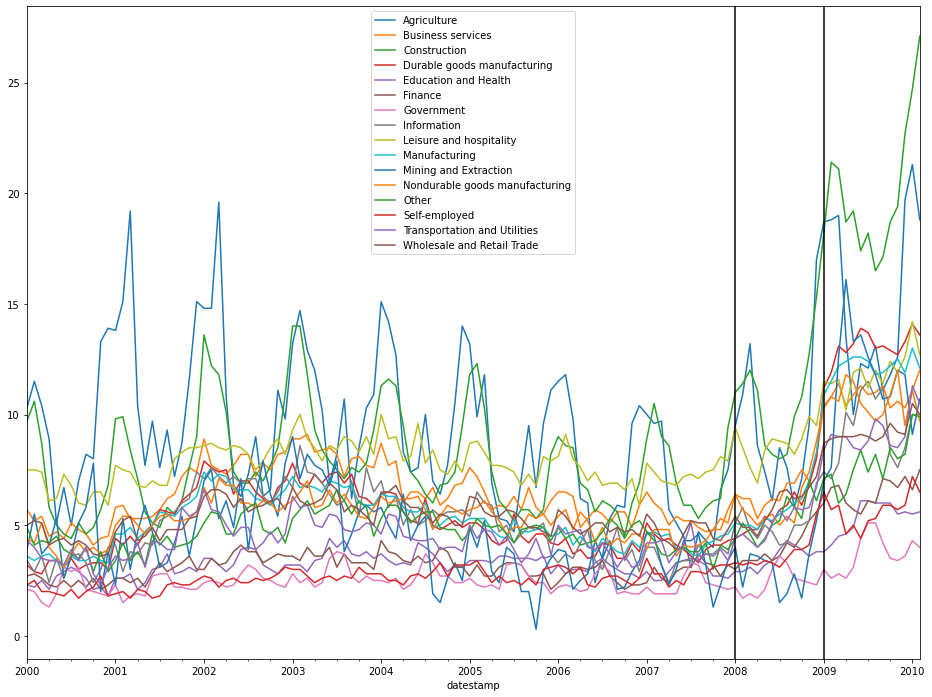

In [24]:
ax = df.plot(figsize = (16,12))
ax.axvline('2008-01-01', color = 'black')
ax.axvline('2009-01-01', color = 'black')
plt.show()

Analysons à présent les moyennes mensuelles sur la période 2000-2010 des taux de chômage pour les différentes industries :

In [25]:
# Exraction  du mois de chaque date dans l'index de la dataframe

index_month = df.index.month

index_month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2],
           dtype='int64', name='datestamp', length=122)

In [26]:
# Taux de chômage moyens mensuels

unemployment_by_month = df.groupby(index_month).mean()

unemployment_by_month

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
1,13.763636,7.863636,12.909091,6.700000,3.363636,3.572727,2.600000,5.772727,9.345455,6.609091,5.600000,6.481818,5.436364,3.600000,5.790909,6.481818
2,13.645455,7.645455,13.600000,6.563636,3.290909,3.890909,2.327273,5.900000,9.136364,6.500000,5.745455,6.418182,5.618182,3.390909,5.618182,6.372727
3,13.830000,7.130000,11.290000,5.850000,3.110000,3.450000,2.190000,5.360000,8.370000,6.000000,5.140000,6.240000,4.910000,2.880000,5.100000,5.860000
4,9.130000,6.270000,9.450000,5.810000,3.040000,3.280000,2.020000,5.230000,7.700000,5.890000,5.640000,6.060000,4.670000,2.680000,4.790000,5.460000
5,7.100000,6.600000,8.120000,5.690000,3.290000,3.350000,2.200000,5.480000,7.930000,5.720000,5.280000,5.790000,4.810000,2.770000,4.500000,5.490000
6,6.770000,6.720000,7.430000,5.830000,3.820000,3.540000,3.100000,5.260000,8.420000,5.730000,5.570000,5.590000,5.160000,2.600000,4.820000,5.840000
7,7.010000,6.740000,7.350000,6.250000,3.870000,3.520000,3.490000,5.320000,7.950000,6.000000,4.950000,5.570000,5.110000,2.770000,5.040000,5.750000
8,8.080000,6.570000,7.300000,5.780000,3.890000,3.610000,3.360000,5.550000,7.920000,5.660000,4.500000,5.490000,5.410000,2.890000,4.580000,5.610000
9,7.090000,6.790000,7.560000,5.820000,3.540000,3.540000,2.610000,5.730000,7.930000,5.720000,4.480000,5.570000,5.020000,3.070000,4.650000,5.630000


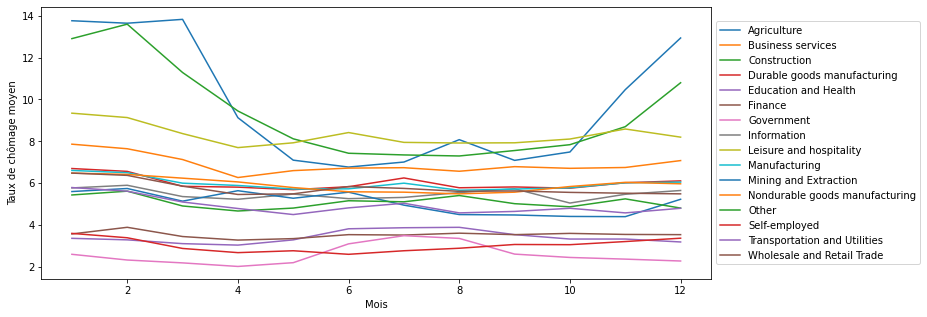

In [27]:
# Graphique des taux de chomâge moyens mensuels

ax = unemployment_by_month.plot(figsize = (12, 5))

ax.set_xlabel('Mois',)

ax.set_ylabel('Taux de chômage moyen', fontsize=10)

ax.legend(bbox_to_anchor = (1.0, 0.5), 
          loc = 'center left')

plt.show()

La moyenne des valeurs des séries chronologiques par mois montre que le taux de chômage a tendance à être beaucoup plus élevé pendant les mois d'hiver pour l'industrie de l'agriculture et de la construction. 

### Décomposition d'une série temporelle

La décomposition d'une série temporelle consiste à extraire la saisonnalité, la tendance et le bruit de cette série. Dans cette section, vous apprendrez à décomposer plusieurs séries temporelles.

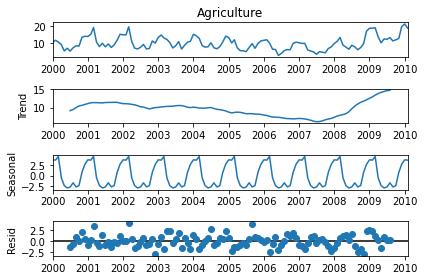

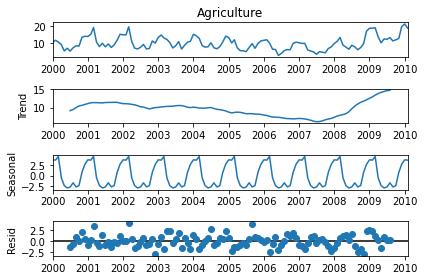

In [28]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(df['Agriculture'], freq=12).plot()

# <center> **Chapitre 3 : Machine Learning pour la modélisation des séries temporelles**

Parmi les approches traditionnelles de modélisation des séries temporelles, les modèles **ARIMA (*Autoregressive integrated moving average*)** sont les plus utilisés. Les modèles ARIMA ont l'avantage d'être faciles à comprendre et interprétables. Mais, tout comme les autres approches traditionnelles de modélisation statistique des séries temporelles, ils ont des limites d'efficacité pour des problèmes beaucoup plus complexes. Pour ces problèmes complexes, on constate de plus en plus, l'utilisation du Machine Learning dans la prévision de séries temporelles.

**N.B : Si vous êtes intéressés par les modèles ARIMA, vous pouvez apprendre la démarche de modélisation à travers le projet n° 12 de mon livre [Machine Learning par la pratique avec Python: Projets réels dans les Finances, l'Immobilier, le Trading, la Santé, le Marketing, etc.](https://www.amazon.fr/gp/product/B08DV8X9D2/ref=dbs_a_def_rwt_hsch_vamf_tkin_p1_i3). Dans ce projet, je vous explique les différentes étapes de moélisation avec ARIMA telles que l'analyse de la stationnarité, le choix de l'ordre du modèle, le réglage des hyperparamètres du modèles, les critères AIC et BIC, l'évaluation du modèle et les prévisions de valeurs futures. Le projet concerne la prévision des prix de l'indice boursier Dow Jones**.

Dans ce chapitre, vous apprendrez à modéliser une série temporelle en utilisant des algorithmes de Machine Learning. L'objectif est d'utiliser divers modèles de régression basés sur l'apprentissage supervisé pour prédire le cours de l'action LVMH à l'aide d'actifs corrélés et de ses propres données historiques. 

La démarche de modélisation consiste à traduire le problème de prévision de série temporelle en un problème de Machine Learning supervisé comme le montre la figure ci-dessous :

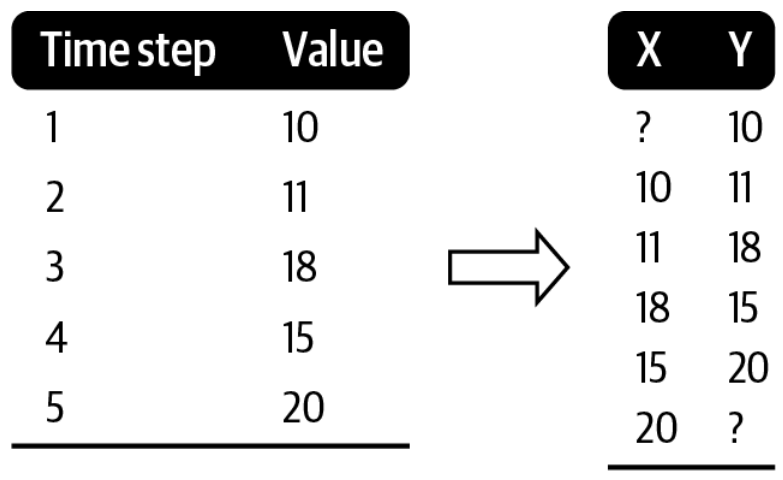

Il s'agit d'utiliser la valeur au pas de temps précédent pour prédire la valeur au pas de temps suivant. Ci-dessus, vous avez les valeurs décalées (*lag* en anglais) d'ordre 1 dans le passé qui constituent la variable indépendante (***X***). La variable ***Y*** est la série temporelle originnelle à prédire. C'est une reproduction du procédé des modèles autorégressifs tels que ARIMA. Bien entendu, avant d'entraîner les différents algorithmes, il faut supprimer les valeurs manquantes.



## Feature Engineering

La plupart du temps en modélisation financière, on ne prédit pas directement le prix d'une action mais on cherche plutôt à prédire le rendement. Ici, nous allons définir notre variable cible comme étant le rendement journalier de l'action LVMH. L'ensemble des variables indépendantes que nous utiliserons est constitué :

* des rendements décalés de 5 jours des autres actions de la dataframe *stocks_price* (Chapitre 2) ;

* des endements décalés de 5, 15, 30 et 60 jours de l'action LVMH.

In [29]:
# Variable cible

period = 5

y = stocks_prices['MC.PA'].shift(-period).pct_change(period)

y.name = 'LVMH_5d_close_future_pct'

y

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2021-12-20    0.028088
2021-12-21    0.022666
2021-12-22    0.002796
2021-12-23   -0.006371
2021-12-24    0.000000
Name: LVMH_5d_close_future_pct, Length: 5660, dtype: float64

In [30]:
# Suppression des valeurs manquantes

y.dropna(inplace = True)

y

Date
2000-01-10    0.161919
2000-01-11    0.093137
2000-01-12    0.032864
2000-01-13   -0.019912
2000-01-14   -0.078723
                ...   
2021-12-20    0.028088
2021-12-21    0.022666
2021-12-22    0.002796
2021-12-23   -0.006371
2021-12-24    0.000000
Name: LVMH_5d_close_future_pct, Length: 5655, dtype: float64

Créons maintenant les diférent prédicteurs :

In [31]:
# Moyennes mobiles de 5, 14, 30, 50, et 200 jours

X_SMA_EMA = pd.DataFrame()

for n in [5, 14, 30, 50, 200]:

    # Création des indicateurs de moyenne mobile et division par le prix de clôture
    X_SMA_EMA['sma' + str(n)] = (stocks_prices['MC.PA'].rolling(window=n).mean()) / stocks_prices['MC.PA']
    
    # Création des indicateurs de moyenne mobile exponentielle et division par le prix de clôture
    X_SMA_EMA['ema' + str(n)] = pd.Series(stocks_prices['MC.PA'].ewm(span=n, min_periods=n).mean()) / stocks_prices['MC.PA']

X_SMA_EMA

,sma5,ema5,sma14,ema14,sma30,ema30,sma50,ema50,sma200,ema200
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.042917,1.019135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-20,1.009917,1.008212,1.008936,1.010677,1.015858,1.004563,0.991823,0.992087,0.930315,0.913275
2021-12-21,1.004562,1.001929,1.004022,1.004633,1.010368,0.999312,0.988597,0.987369,0.926435,0.909369
2021-12-22,0.986022,0.988308,0.987390,0.987098,0.991660,0.981192,0.971187,0.969433,0.909575,0.892778


In [32]:
# RSI de de 5, 14, 30, 50, et 200 jours
def RSI(series, periode):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) 
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) 
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

X_RSI = pd.DataFrame()

for n in [5, 14, 30, 50, 200]:
    X_RSI['RSI' + str(n)] = RSI(stocks_prices['MC.PA'], n)
    
X_RSI

,RSI5,RSI14,RSI30,RSI50,RSI200
Date,,,,,
2000-01-10,21.259945,21.259945,21.259945,21.259945,21.259945
2000-01-11,30.192105,30.192105,30.192105,30.192105,30.192105
2000-01-12,47.403077,47.403077,47.403077,47.403077,47.403077
2000-01-13,63.604655,63.604655,63.604655,63.604655,63.604655
2000-01-14,71.264533,71.264533,71.264533,71.264533,71.264533
...,...,...,...,...,...
2021-12-20,37.071916,37.071916,37.071916,37.071916,37.071916
2021-12-21,44.509969,44.509969,44.509969,44.509969,44.509969
2021-12-22,64.316389,64.316389,64.316389,64.316389,64.316389


In [33]:
# Importation des volumes d'acions LVMH négociés

lvmh_volume = DataReader(
    'MC.PA', 
    'yahoo', 
    start = '2000-01-01')['Volume']

lvmh_volume.head()

Date
2000-01-03     615855.0
2000-01-04    1691700.0
2000-01-05    1563735.0
2000-01-06    1641215.0
2000-01-07    1360530.0
Name: Volume, dtype: float64

In [34]:
# Caractéristiques liées au volume d'actions LVMH négociées 

X_Volume = pd.DataFrame()
X_Volume['Adj_Volume_1d_change'] = lvmh_volume.pct_change()
X_Volume['Adj_Volume_1d_change']

Date
2000-01-03         NaN
2000-01-04    1.746913
2000-01-05   -0.075643
2000-01-06    0.049548
2000-01-07   -0.171023
                ...   
2021-12-20   -0.525577
2021-12-21   -0.178987
2021-12-22    0.055316
2021-12-23   -0.034357
2021-12-24   -0.846807
Name: Adj_Volume_1d_change, Length: 5631, dtype: float64

In [35]:
X_Volume['Adj_Volume_1d_change_SMA'] = (X_Volume['Adj_Volume_1d_change'].rolling(window=5).mean())
X_Volume

,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,
2000-01-03,NaN,NaN
2000-01-04,1.746913,NaN
2000-01-05,-0.075643,NaN
2000-01-06,0.049548,NaN
2000-01-07,-0.171023,NaN
...,...,...
2021-12-20,-0.525577,0.175005
2021-12-21,-0.178987,0.120517
2021-12-22,0.055316,0.102790


In [36]:
# Rendements décalés de 5 jours des autres actions de la dataframe stocks_price

X_lags_others_stocks = pd.concat(
    [stocks_prices[stk].shift(period).pct_change() for stk in symbols if stk != 'MC.PA'], 
    axis = 1
)

X_lags_others_stocks.columns = [i + '_DT' for i in symbols if i != 'MC.PA']

X_lags_others_stocks.dropna(inplace = True)

X_lags_others_stocks

,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,SU.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,
2000-01-11,-0.044379,-0.053435,-0.070976,-0.036364,-0.028108,-0.062189,-0.035443,0.016798,-0.098529,-0.017511
2000-01-12,-0.009288,-0.052419,-0.034107,-0.025157,-0.021135,-0.042175,-0.041995,-0.000944,-0.077488,-0.014004
2000-01-13,0.071875,-0.012766,0.038136,-0.029032,-0.034091,0.038493,0.050685,0.030002,0.012378,0.013557
2000-01-14,-0.012245,0.030173,0.020408,0.004984,0.012941,0.053333,0.018253,-0.006192,0.048035,-0.019109
2000-01-17,-0.034829,0.018410,0.019333,0.000826,0.005807,-0.021519,-0.016645,0.010847,0.016667,-0.005194
...,...,...,...,...,...,...,...,...,...,...
2021-12-20,0.002977,0.007955,-0.007244,-0.014402,-0.012520,-0.001040,0.000599,-0.037926,-0.004144,-0.012092
2021-12-21,-0.013292,0.021565,-0.006699,0.006328,0.001607,-0.011106,-0.025506,0.013427,-0.024967,-0.002324
2021-12-22,0.006539,-0.001741,0.005058,-0.010176,-0.003566,0.014389,0.013763,-0.023611,0.022502,0.006367


In [37]:
# Ensemble total des prédicteurs

X = pd.concat([X_SMA_EMA, X_RSI, X_Volume, X_lags_others_stocks], axis = 1)

X

,sma5,ema5,sma14,ema14,sma30,ema30,sma50,ema50,sma200,ema200,...,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,SU.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.042917,1.019135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,1.009917,1.008212,1.008936,1.010677,1.015858,1.004563,0.991823,0.992087,0.930315,0.913275,...,0.002977,0.007955,-0.007244,-0.014402,-0.012520,-0.001040,0.000599,-0.037926,-0.004144,-0.012092
2021-12-21,1.004562,1.001929,1.004022,1.004633,1.010368,0.999312,0.988597,0.987369,0.926435,0.909369,...,-0.013292,0.021565,-0.006699,0.006328,0.001607,-0.011106,-0.025506,0.013427,-0.024967,-0.002324
2021-12-22,0.986022,0.988308,0.987390,0.987098,0.991660,0.981192,0.971187,0.969433,0.909575,0.892778,...,0.006539,-0.001741,0.005058,-0.010176,-0.003566,0.014389,0.013763,-0.023611,0.022502,0.006367


In [38]:
# La datatest finale

clean_dataset = pd.concat([y, X], axis=1).dropna()

clean_dataset

,LVMH_5d_close_future_pct,sma5,ema5,sma14,ema14,sma30,ema30,sma50,ema50,sma200,...,AI.PA_DT,ORA.PA_DT,OR.PA_DT,TTE.PA_DT,BNP.PA_DT,SAN.PA_DT,SU.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-24,0.131707,1.001464,0.992749,0.975610,0.977389,0.942195,0.974974,0.988309,0.996519,1.231104,...,-0.006024,-0.003305,0.001855,0.008723,-0.004115,0.000000,0.005814,0.006834,-0.022358,-0.011621
2001-04-25,0.102977,0.988254,0.988244,0.971440,0.971544,0.934835,0.967049,0.976637,0.986642,1.216109,...,0.010303,0.054377,0.022222,-0.008030,0.014463,-0.003937,0.026012,-0.007297,0.141372,0.010582
2001-04-26,0.021538,0.954154,0.963276,0.937198,0.938420,0.898615,0.929509,0.932323,0.945602,1.160762,...,0.004799,0.018868,-0.037440,-0.003736,0.021385,-0.022925,0.022535,0.014189,0.021858,-0.036067
2001-04-27,-0.008804,0.931181,0.945834,0.903469,0.909039,0.863243,0.893866,0.889567,0.905742,1.105452,...,-0.008955,-0.016049,0.027604,-0.003750,-0.012961,-0.001618,0.013774,-0.021237,-0.007130,0.007846
2001-04-30,-0.029454,0.937931,0.950753,0.893627,0.904754,0.852922,0.883292,0.871494,0.891309,1.080868,...,-0.009639,-0.015684,-0.015262,-0.002509,-0.017172,-0.004862,-0.028532,0.018943,-0.021544,0.014970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,0.028088,1.009917,1.008212,1.008936,1.010677,1.015858,1.004563,0.991823,0.992087,0.930315,...,0.002977,0.007955,-0.007244,-0.014402,-0.012520,-0.001040,0.000599,-0.037926,-0.004144,-0.012092
2021-12-21,0.022666,1.004562,1.001929,1.004022,1.004633,1.010368,0.999312,0.988597,0.987369,0.926435,...,-0.013292,0.021565,-0.006699,0.006328,0.001607,-0.011106,-0.025506,0.013427,-0.024967,-0.002324
2021-12-22,0.002796,0.986022,0.988308,0.987390,0.987098,0.991660,0.981192,0.971187,0.969433,0.909575,...,0.006539,-0.001741,0.005058,-0.010176,-0.003566,0.014389,0.013763,-0.023611,0.022502,0.006367


In [39]:
# Feature ingénierie des dates

days_of_week = pd.get_dummies(
    clean_dataset.index.dayofweek, 
    prefix = 'weekday', 
    drop_first = True)

days_of_week.index = clean_dataset.index

clean_dataset = pd.concat([clean_dataset, days_of_week], axis = 1)

clean_dataset

,LVMH_5d_close_future_pct,sma5,ema5,sma14,ema14,sma30,ema30,sma50,ema50,sma200,...,BNP.PA_DT,SAN.PA_DT,SU.PA_DT,URW.AS_DT,DSY.PA_DT,ENGI.PA_DT,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2001-04-24,0.131707,1.001464,0.992749,0.975610,0.977389,0.942195,0.974974,0.988309,0.996519,1.231104,...,-0.004115,0.000000,0.005814,0.006834,-0.022358,-0.011621,1,0,0,0
2001-04-25,0.102977,0.988254,0.988244,0.971440,0.971544,0.934835,0.967049,0.976637,0.986642,1.216109,...,0.014463,-0.003937,0.026012,-0.007297,0.141372,0.010582,0,1,0,0
2001-04-26,0.021538,0.954154,0.963276,0.937198,0.938420,0.898615,0.929509,0.932323,0.945602,1.160762,...,0.021385,-0.022925,0.022535,0.014189,0.021858,-0.036067,0,0,1,0
2001-04-27,-0.008804,0.931181,0.945834,0.903469,0.909039,0.863243,0.893866,0.889567,0.905742,1.105452,...,-0.012961,-0.001618,0.013774,-0.021237,-0.007130,0.007846,0,0,0,1
2001-04-30,-0.029454,0.937931,0.950753,0.893627,0.904754,0.852922,0.883292,0.871494,0.891309,1.080868,...,-0.017172,-0.004862,-0.028532,0.018943,-0.021544,0.014970,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,0.028088,1.009917,1.008212,1.008936,1.010677,1.015858,1.004563,0.991823,0.992087,0.930315,...,-0.012520,-0.001040,0.000599,-0.037926,-0.004144,-0.012092,0,0,0,0
2021-12-21,0.022666,1.004562,1.001929,1.004022,1.004633,1.010368,0.999312,0.988597,0.987369,0.926435,...,0.001607,-0.011106,-0.025506,0.013427,-0.024967,-0.002324,1,0,0,0
2021-12-22,0.002796,0.986022,0.988308,0.987390,0.987098,0.991660,0.981192,0.971187,0.969433,0.909575,...,-0.003566,0.014389,0.013763,-0.023611,0.022502,0.006367,0,1,0,0


## Analyse exploratoire des données

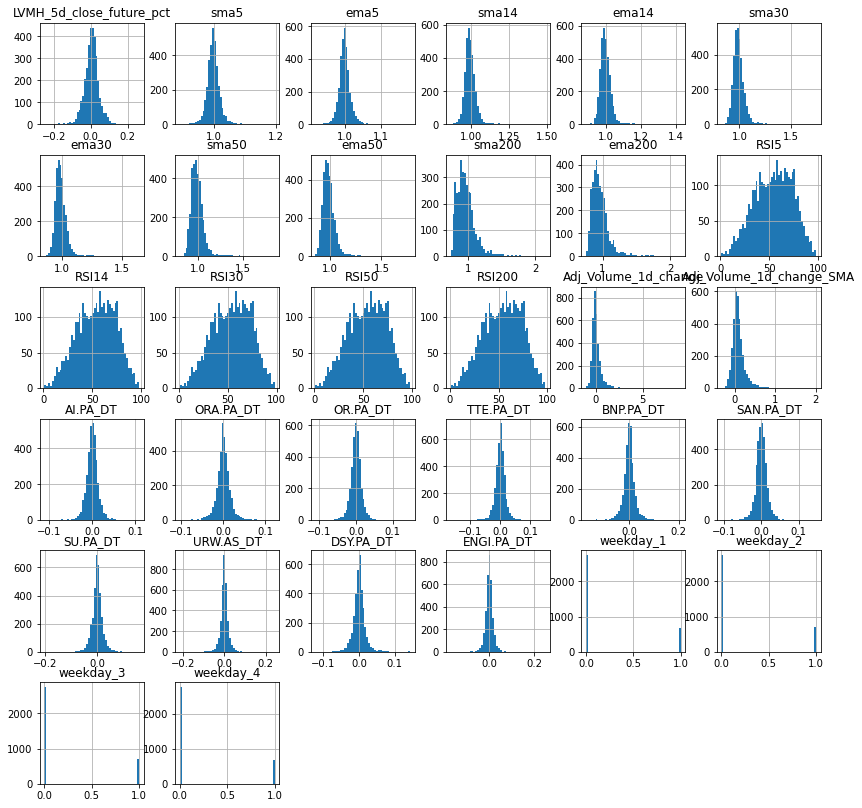

In [40]:
# Histogrammes

clean_dataset.hist(
    bins=50, 
    sharex=False, 
    sharey=False, 
    figsize=(14,14)
)

plt.show()

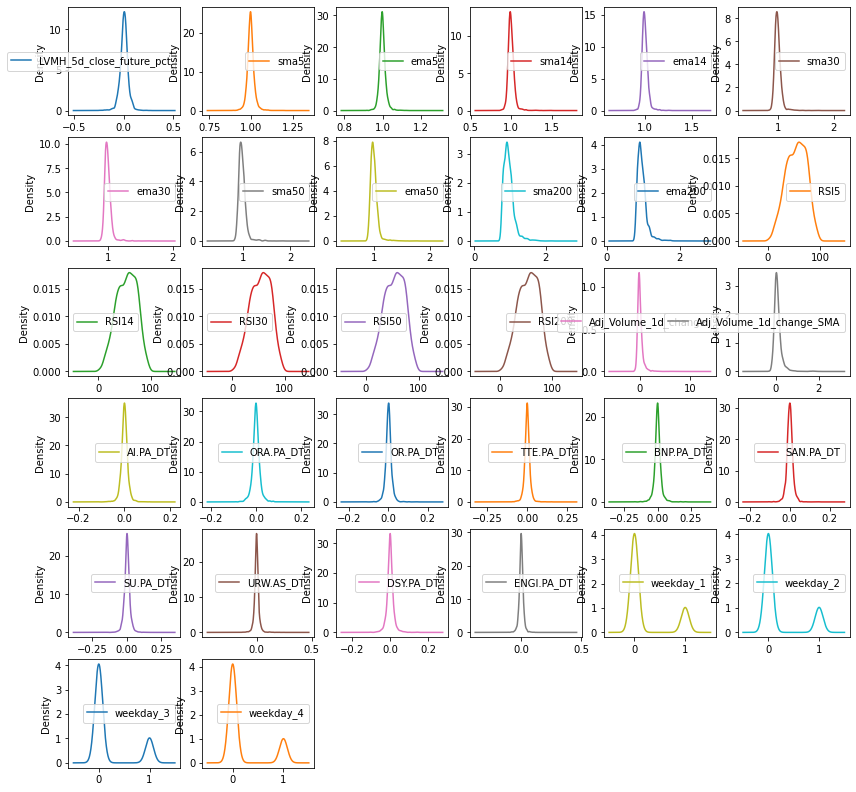

In [41]:
# Densités

clean_dataset.plot(
    kind = 'density',
    subplots = True,
    layout=(6,6),
    sharex=False, 
    sharey=False, 
    legend = True,
    figsize=(14,14)
)

plt.show()

In [42]:
# Matrice de graphiques

#sns.pairplot(clean_dataset);

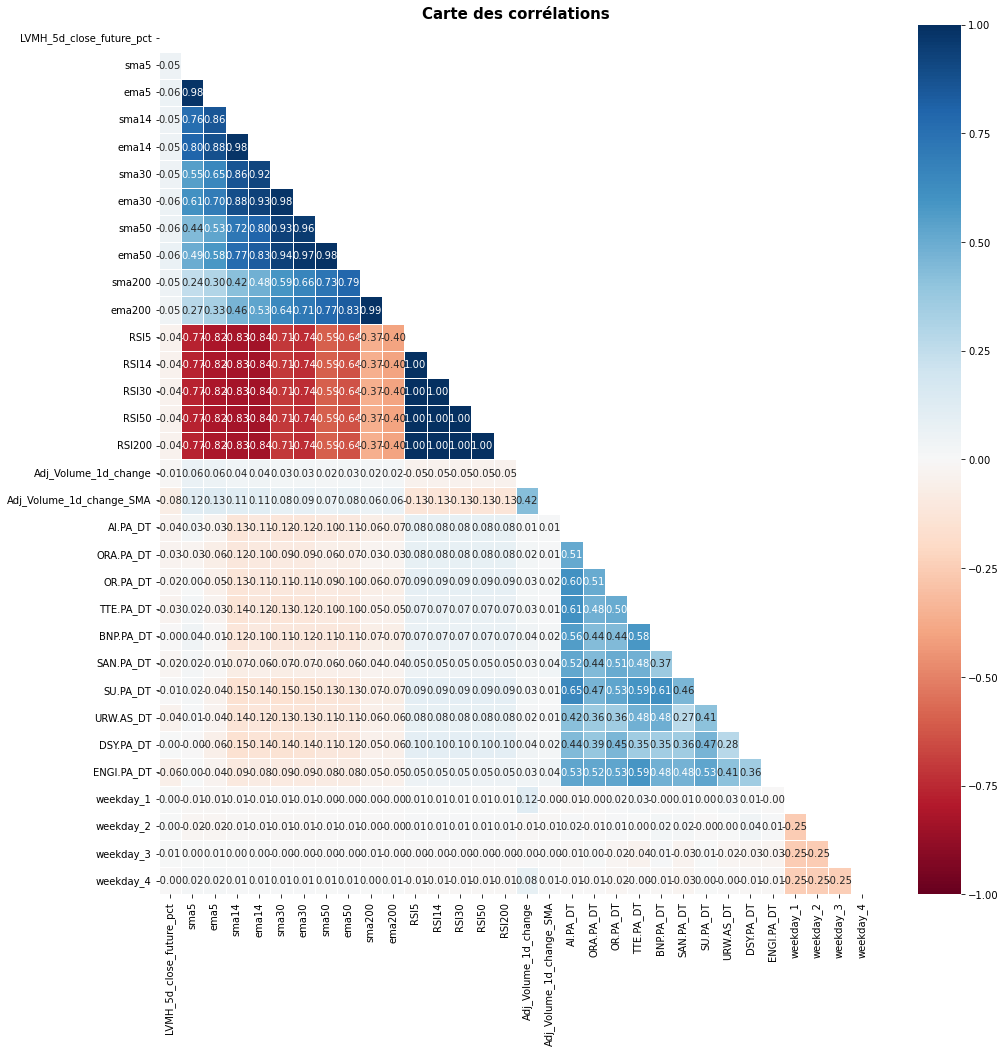

In [43]:
# Carte des corrélations

plt.figure(figsize=(16,16))

mask = np.triu(np.ones_like(clean_dataset.corr(), dtype=bool))

sns.heatmap(clean_dataset.corr(), 
            mask=mask, center=0, cmap='RdBu', linewidths=1, 
            annot=True, fmt=".2f", vmin=-1, vmax=1
)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")

plt.show()

## Modélisation

Pour la modélisation des séries temporelles, les données d'entraînement doivent être les données les plus anciennes et les données de test doivent être les données les plus récentes.

In [44]:
# Données d'entraînement et de test

y = clean_dataset['LVMH_5d_close_future_pct']

X = clean_dataset.drop('LVMH_5d_close_future_pct', axis = 1)

validation_size = 0.25

train_size = int(len(X) * (1-validation_size))

X_train, X_test = X[0:train_size], X[train_size:len(X)]

Y_train, Y_test = y[0:train_size], y[train_size:len(X)]

In [45]:
X_train.shape

(2572, 31)

In [46]:
Y_train.shape

(2572,)

In [47]:
X_test.shape

(858, 31)

In [48]:
Y_test.shape

(858,)

In [49]:
# Liste des algorithmes à entraîner

seed = 123

models = []

models.append(('LR', {'model':LinearRegression()}))
models.append(('LASSO', {'model':Lasso()}))
models.append(('EN', {'model':ElasticNet()}))
models.append(('KNN', {'model':KNeighborsRegressor()}))
models.append(('CART', {'model':DecisionTreeRegressor(random_state = seed)}))
models.append(('SVR', {'model':SVR()}))

models.append(('MLP', {'model':MLPRegressor(random_state = seed)}))

models.append(('ABR', {'model':AdaBoostRegressor(random_state = seed)}))
models.append(('XGBOOST', {'model':XGBRegressor(random_state=seed)}))
models.append(('GBR', {'model':GradientBoostingRegressor(random_state = seed)}))

models.append(('RFR', {'model':RandomForestRegressor(random_state = seed)}))
models.append(('ETR', {'model':ExtraTreesRegressor(random_state = seed)}))

In [50]:
algos_ml = dict(models)
algos_ml

{'LR': {'model': LinearRegression()},
 'LASSO': {'model': Lasso()},
 'EN': {'model': ElasticNet()},
 'KNN': {'model': KNeighborsRegressor()},
 'CART': {'model': DecisionTreeRegressor(random_state=123)},
 'SVR': {'model': SVR()},
 'MLP': {'model': MLPRegressor(random_state=123)},
 'ABR': {'model': AdaBoostRegressor(random_state=123)},
 'XGBOOST': {'model': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=123, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
      

In [51]:
num_folds = 5
scoring = 'neg_mean_squared_error'
kfold_results = []

for model_name in algos_ml.keys():
    
    kfold = KFold(n_splits=num_folds)
    #Conversion de 'neg_mean_squared_error' en valeur positive pour calculer RMSE (racine carrée de MSE)
                # plus l'erreur est faible, plus le modèle est performant
    cv_results = np.sqrt(-1* cross_val_score(algos_ml[model_name]['model'], X_train, Y_train, cv=kfold, scoring=scoring))
    kfold_results.append(cv_results)
    algos_ml[model_name]['Mean CV results'] = cv_results.mean()
    algos_ml[model_name]['Std CV results'] = cv_results.std()
    
    fitted_model = algos_ml[model_name]['model'].fit(X_train, Y_train)
    algos_ml[model_name]['RMSE train'] = np.sqrt(mean_squared_error(Y_train, fitted_model.predict(X_train)))
    algos_ml[model_name]['RMSE test'] = np.sqrt(mean_squared_error(Y_test, fitted_model.predict(X_test)))
    algos_ml[model_name]['R² train'] = r2_score(Y_train, fitted_model.predict(X_train))
    algos_ml[model_name]['R² test'] = r2_score(Y_test, fitted_model.predict(X_test))

In [52]:
algos_ml

{'LR': {'model': LinearRegression(),
  'Mean CV results': 0.0420421493496272,
  'Std CV results': 0.013994905735224916,
  'RMSE train': 0.04136590796067917,
  'RMSE test': 0.039498012929672664,
  'R² train': 0.026343007169387866,
  'R² test': 0.0002885936795056221},
 'LASSO': {'model': Lasso(),
  'Mean CV results': 0.04024630513893933,
  'Std CV results': 0.012489143060392607,
  'RMSE train': 0.04192176582301949,
  'RMSE test': 0.039606044544038994,
  'R² train': 0.0,
  'R² test': -0.005187536683548322},
 'EN': {'model': ElasticNet(),
  'Mean CV results': 0.04024630513893933,
  'Std CV results': 0.012489143060392607,
  'RMSE train': 0.04192176582301949,
  'RMSE test': 0.039606044544038994,
  'R² train': 0.0,
  'R² test': -0.005187536683548322},
 'KNN': {'model': KNeighborsRegressor(),
  'Mean CV results': 0.04436780801663142,
  'Std CV results': 0.01145353789126649,
  'RMSE train': 0.036962378195516114,
  'RMSE test': 0.04296745357811589,
  'R² train': 0.22260690742350653,
  'R² test':

In [53]:
# Meilleur affichage sous forme de tableau

results_metrics = pd.DataFrame.from_dict(
    algos_ml, 
    'index')[['RMSE train', 'RMSE test', 'Mean CV results', 'Std CV results', 'R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print

,RMSE train,RMSE test,Mean CV results,Std CV results,R² train,R² test
LR,4.136591e-02,0.039498,0.042042,0.013995,0.026343,0.000289
LASSO,4.192177e-02,0.039606,0.040246,0.012489,0.000000,-0.005188
EN,4.192177e-02,0.039606,0.040246,0.012489,0.000000,-0.005188
GBR,3.236571e-02,0.040382,0.043190,0.014984,0.403938,-0.044978
ETR,6.145222e-14,0.040390,0.043126,0.015047,1.000000,-0.045351
RFR,1.470575e-02,0.040433,0.042622,0.014692,0.876946,-0.047599
SVR,4.267695e-02,0.040626,0.041710,0.011647,-0.036353,-0.057629
ABR,3.830285e-02,0.040636,0.041685,0.014114,0.165199,-0.058139
MLP,4.243641e-02,0.041247,0.042223,0.013698,-0.024704,-0.090212
KNN,3.696238e-02,0.042967,0.044368,0.011454,0.222607,-0.183051


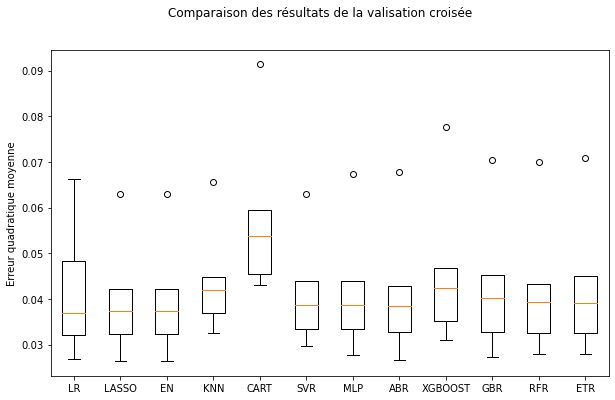

In [54]:
# Comparaison des résultats de la valisation croisée

fig = plt.figure()
fig.suptitle('Comparaison des résultats de la valisation croisée')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(list(algos_ml.keys()))
fig.set_size_inches(10,6)
plt.ylabel('Erreur quadratique moyenne')
plt.show()

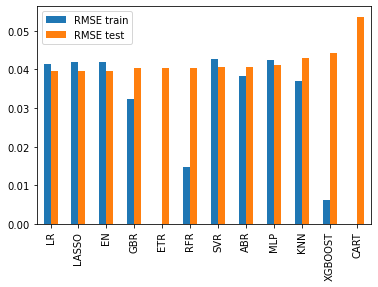

In [55]:
# Comparaison des Erreurs d'entraînement et de test pour tous les modèles

best_print[['RMSE train', 'RMSE test']].plot(kind = 'bar');

In [63]:
# Modèle final

best_model = algos_ml['LR']['model']
best_model

LinearRegression()

In [57]:
# Fonction d'évaluation du modèle

def evaluate_model(nom_model, predictions):
    plt.figure(figsize = (10, 6))
    l1, = plt.plot(Y_test.index, np.exp(Y_test).cumprod(), label = 'Observation')
    l2, = plt.plot(Y_test.index, predictions, label = 'Prediction')
    plt.legend(handles = [l1, l2])
    plt.show()

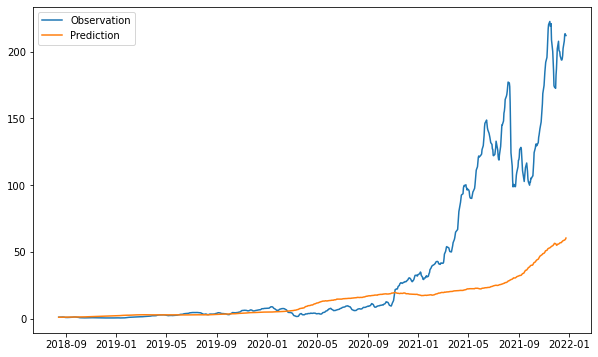

In [64]:
evaluate_model(best_model, predictions = np.exp(best_model.predict(X_test)).cumprod())

En regardant le graphique, nous voyons clairement que la tendance a été parfaitement capturée par le modèle. La série prédite est moins volatile par rapport à la série chronologique réelle, et elle s'aligne sur les données réelles des premiers mois de l'ensemble de test. Un point à noter est que le but du modèle est de calculer le rendement du lendemain compte tenu des données observées jusqu'à aujourd'hui, et non de prédire le cours de l'action plusieurs jours dans le futur compte tenu des données actuelles. Par conséquent, un écart par rapport aux données réelles est attendu à mesure que nous nous éloignons du début de l'ensemble de test. Le modèle semble bien fonctionner pendant les premiers mois, l'écart par rapport aux données réelles augmentant deux ans (Septembre 2018 à Septembre 2020) après le début de l'ensemble de test. 

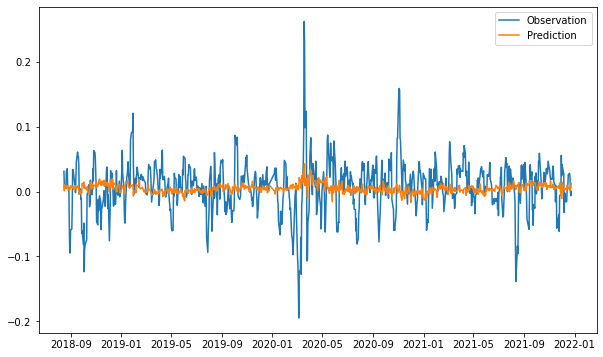

In [65]:
plt.figure(figsize = (10, 6))
l1, = plt.plot(Y_test.index, Y_test, label = 'Observation')
l2, = plt.plot(Y_test.index, best_model.predict(X_test), label = 'Prediction')
plt.legend(handles = [l1, l2])
plt.show()

In [59]:
# Sauvegarde du modèle

import joblib

joblib.dump(value = best_model, filename = 'final_model.pkl')

['final_model.pkl']

In [60]:
import pandas as pd
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [61]:
df.shift(periods=3) #------->features (periode positive)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [62]:
df.shift(periods=-3) #------->target (periode negative)

,Col1,Col2,Col3
2020-01-01,30.0,33.0,37.0
2020-01-02,45.0,48.0,52.0
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN
